In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Task 1
Load the dataset and perform necessary preprocessing steps, such as handling missing values, scaling, etc.

In [18]:
import pandas as pd

In [19]:
path = "/content/drive/MyDrive/ML_PYTHON_PROJECT/airlines_data.xlsx"

df = pd.read_excel(path)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [21]:
df.shape

(10683, 11)

### Filling null values

In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [23]:
df = df.fillna(method='ffill')

### Cleaning the airlines column

In [24]:
df['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

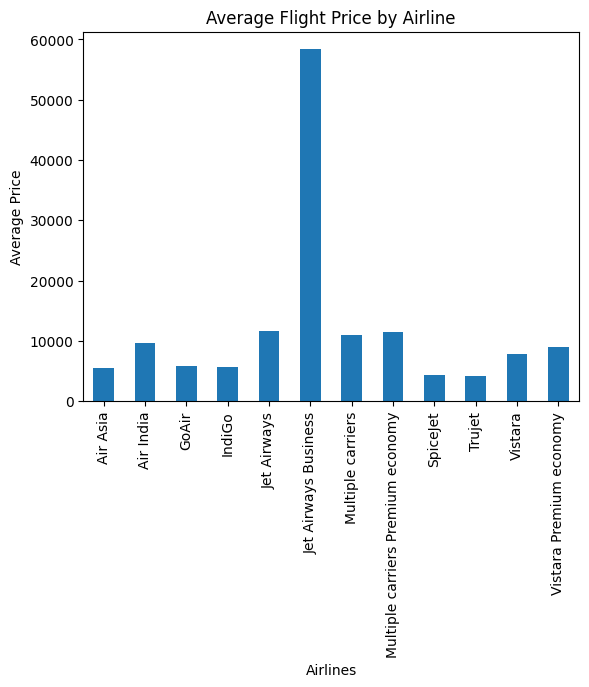

In [25]:
import matplotlib.pyplot as plt
avg_price_by_airline = df.groupby('Airline')['Price'].mean()
avg_price_by_airline.plot(kind='bar')
plt.xlabel('Airlines')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Airline')
plt.show()

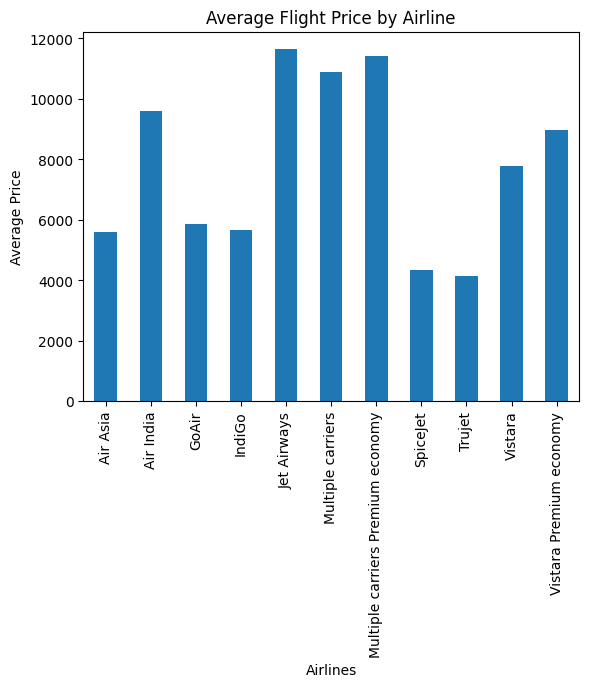

In [26]:
df_filtered = df[df['Airline'] != 'Jet Airways Business']

avg_price_by_airline = df_filtered.groupby('Airline')['Price'].mean()

avg_price_by_airline.plot(kind='bar')
plt.xlabel('Airlines')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Airline')
plt.show()

As most of the premium brands have similar price range with respect to their main brands except Jet Airways Business. We will combine them.

In [27]:
import numpy as np

df['Airline'] = np.where(df['Airline']== 'Multiple carriers Premium economy', 'Multiple carriers', df['Airline'])
df['Airline'] = np.where(df['Airline']=='Vistara Premium economy', 'Vistara', df['Airline'])

df['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Jet Airways Business',
 'Trujet']

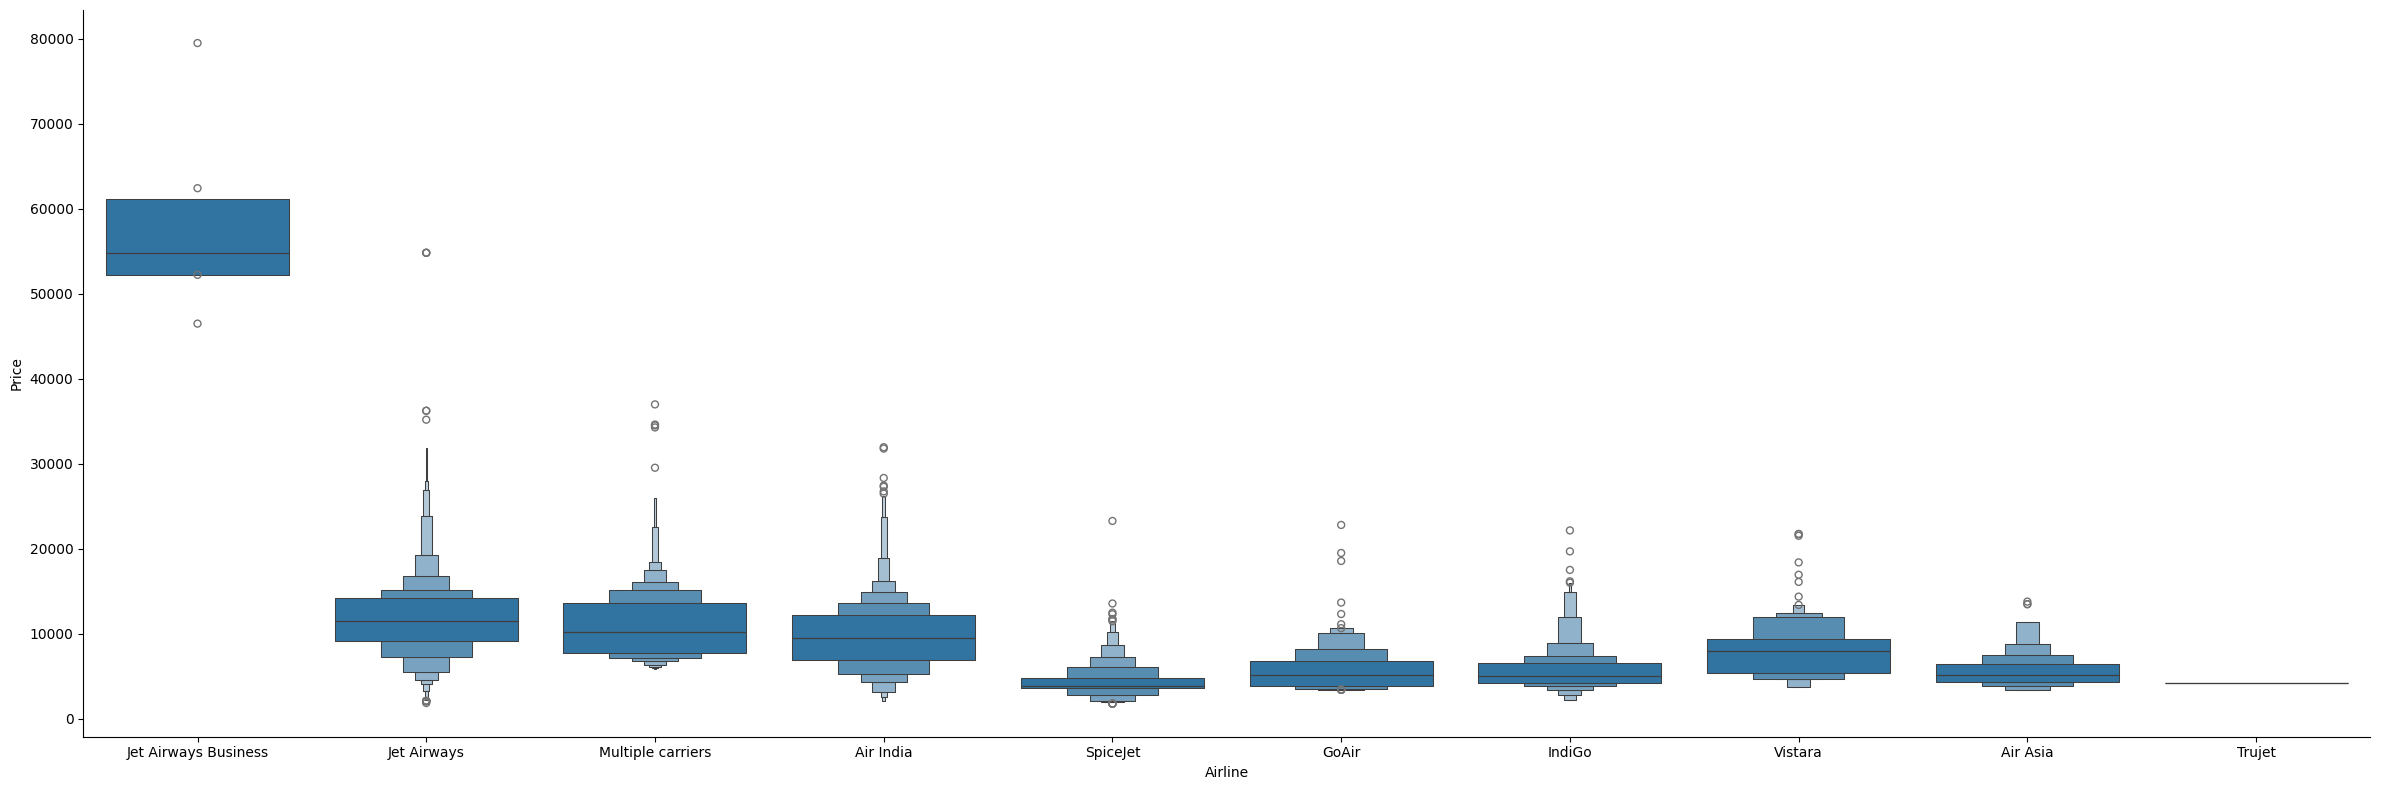

In [28]:
import seaborn as sns
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

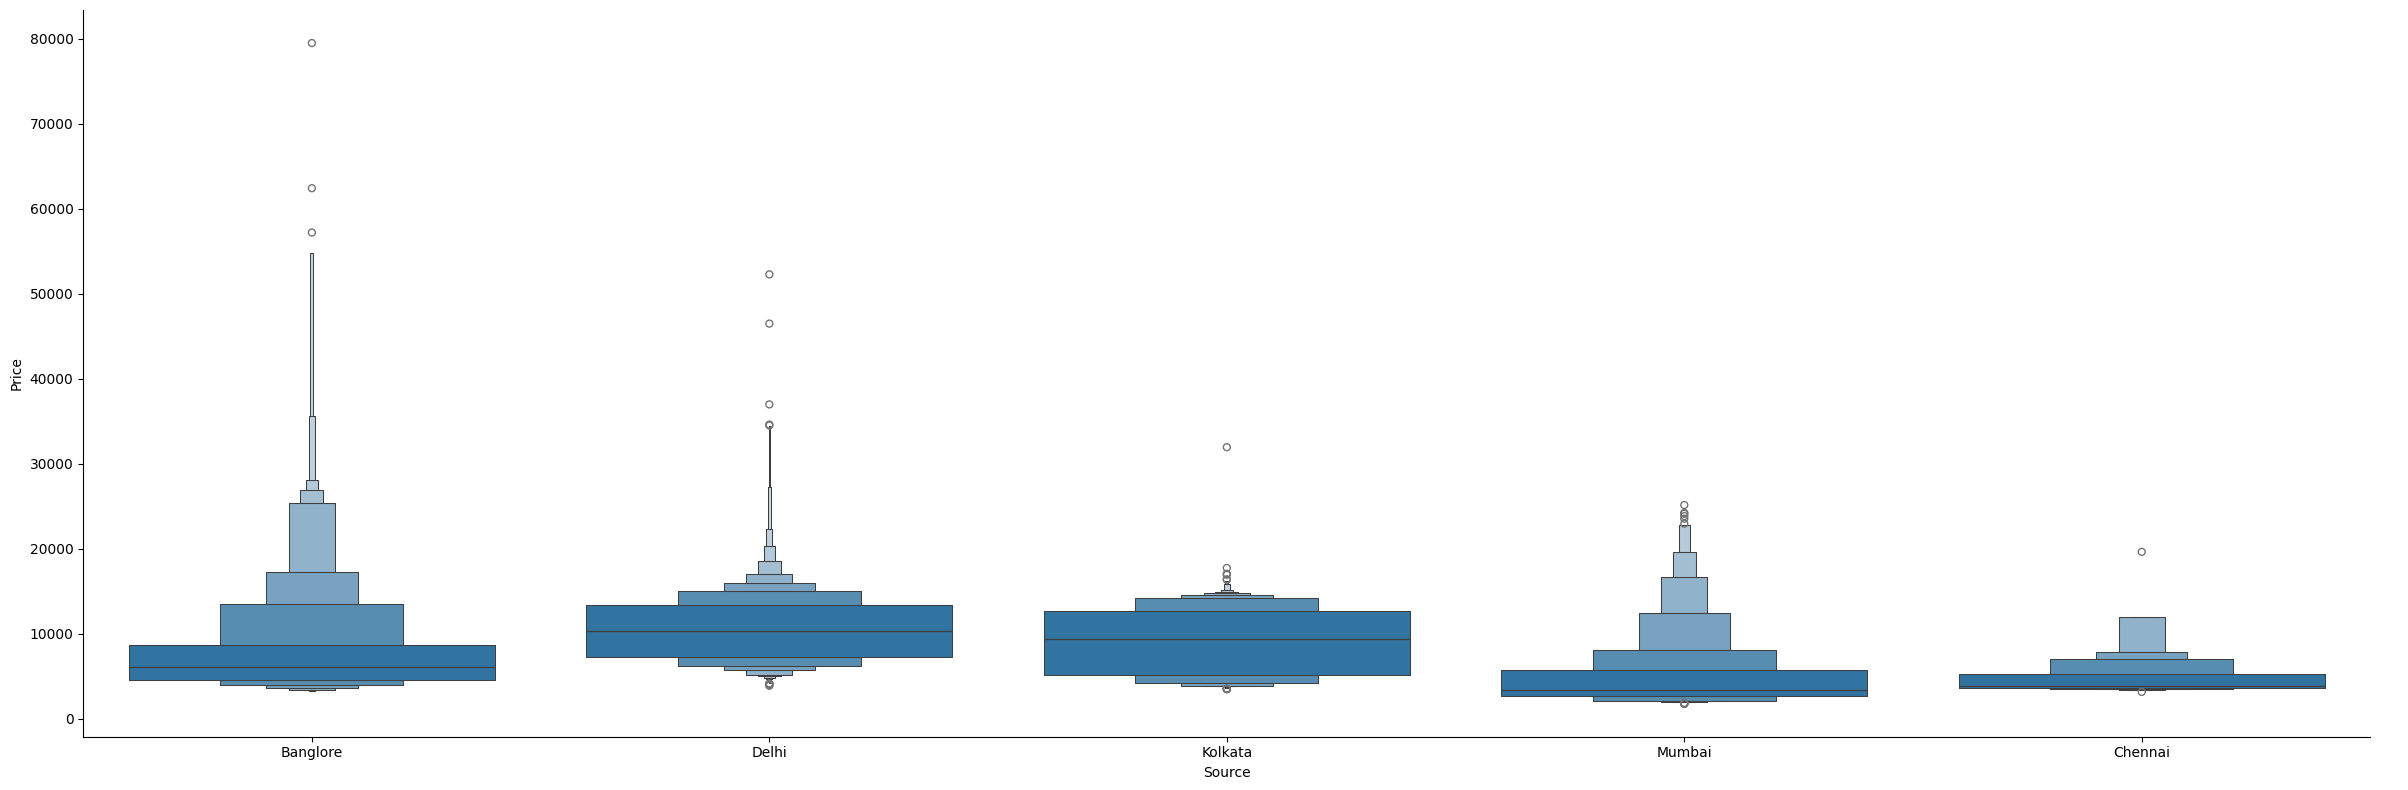

In [29]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

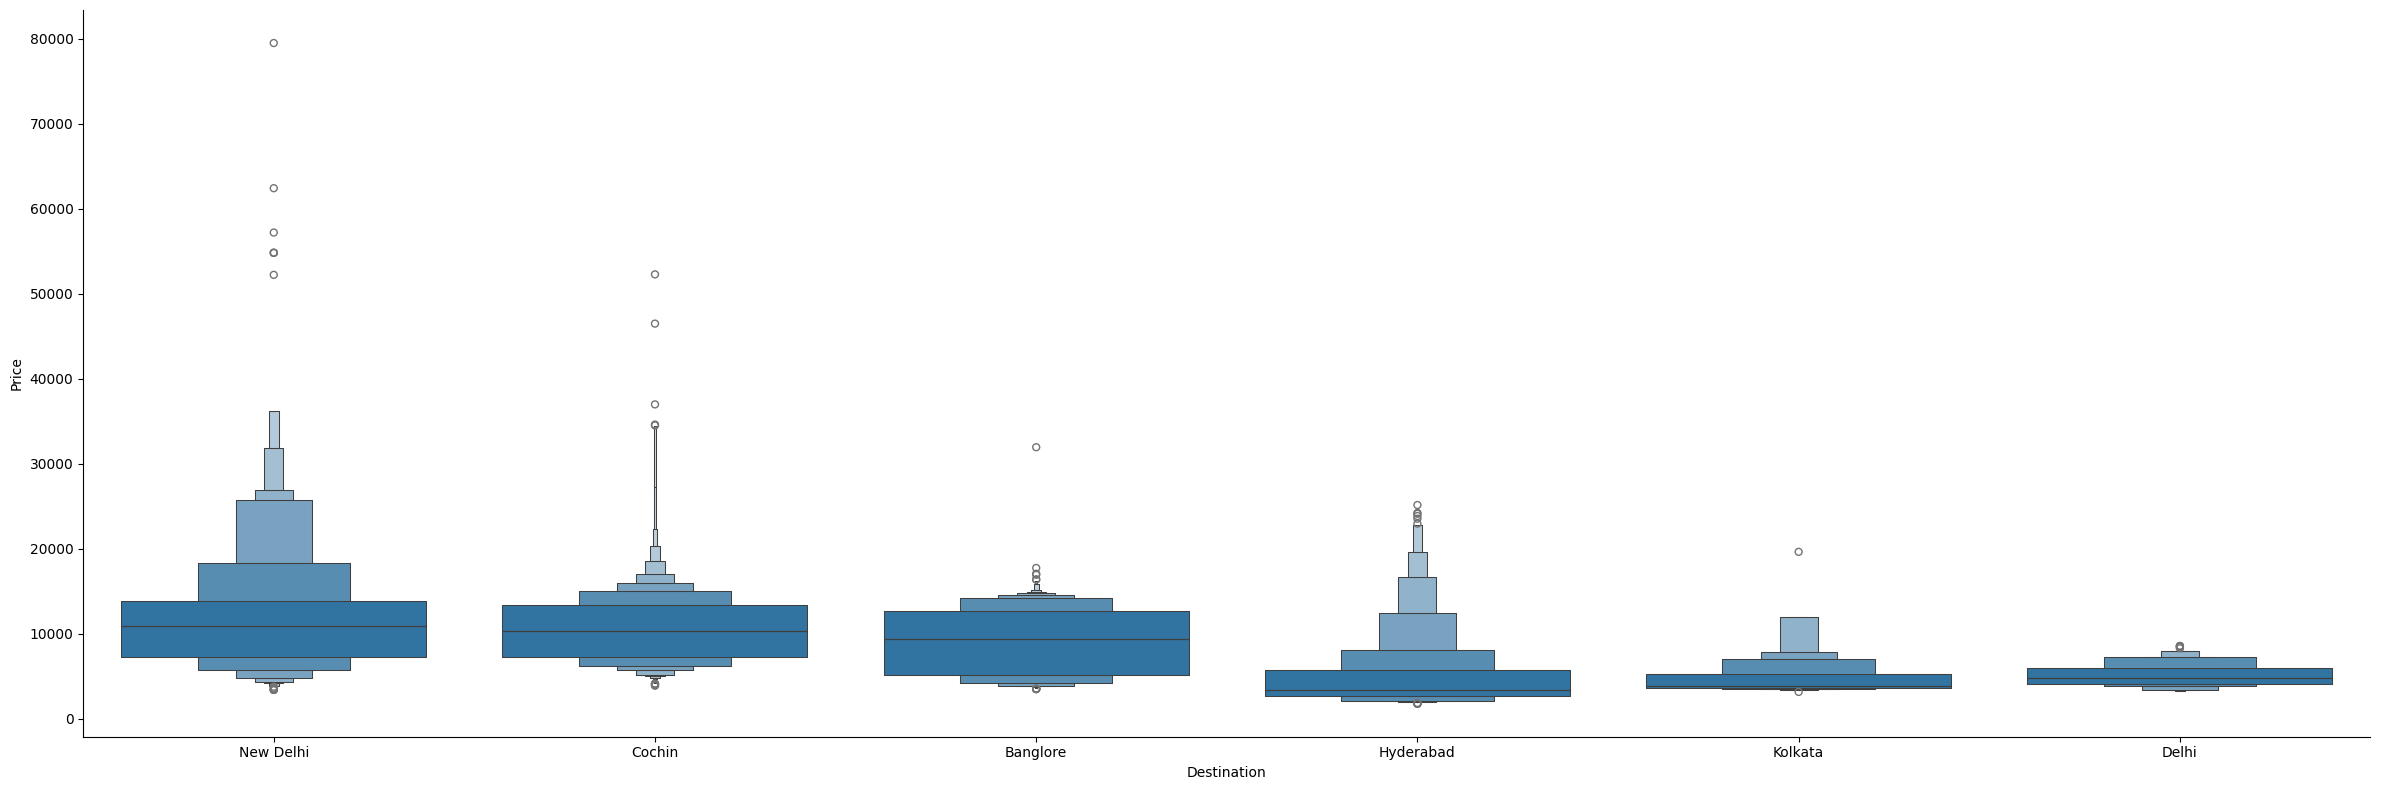

In [30]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

### One Hot Encoding

In [31]:
df_encoded = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination'], drop_first=True)
df_encoded.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_encoded.shape

(10683, 26)

In [ ]:
df_encoded['Total_Stops'].value_counts()

1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

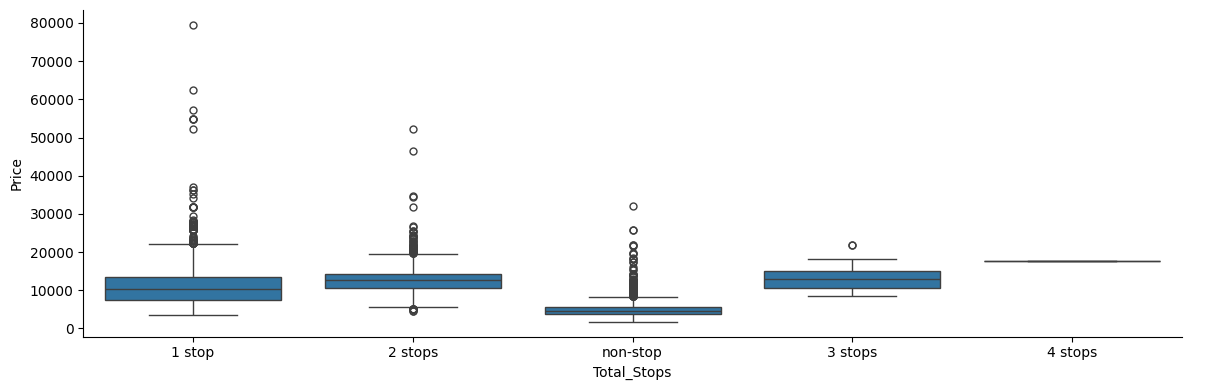

In [34]:
# BoxPlot of Number of stops with Ticket.
sns.catplot(y = "Price", x = "Total_Stops", data = df_encoded.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Replace the number of stops with numberic values and also drop the Route column as we already have all the important data that we need

In [ ]:
df_encoded.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df_encoded.drop('Route', axis=1, inplace=True)

In [ ]:
df_encoded['Date_of_Journey'] = pd.to_datetime(df_encoded['Date_of_Journey'], dayfirst=True)
df_encoded['Day'] = df_encoded['Date_of_Journey'].dt.day
df_encoded['Month'] = df_encoded['Date_of_Journey'].dt.month
df_encoded['day_of_week'] = pd.to_datetime(df_encoded['Date_of_Journey']).dt.day_name()
df_encoded.drop('Date_of_Journey', axis=1, inplace=True)
df_encoded.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,day_of_week
0,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,...,0,0,0,0,0,0,1,24,3,Sunday
1,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,...,1,0,0,0,0,0,0,1,5,Wednesday
2,09:25,04:25 10 Jun,19h,2,No info,13882,0,0,0,1,...,0,0,1,0,0,0,0,9,6,Sunday
3,18:05,23:30,5h 25m,1,No info,6218,0,0,1,0,...,1,0,0,0,0,0,0,12,5,Sunday
4,16:50,21:35,4h 45m,1,No info,13302,0,0,1,0,...,0,0,0,0,0,0,1,1,3,Friday


As this data is only for a single year, we can drop the column since it does not provide any value to our algorithm

In [ ]:
from datetime import timedelta

def parse_duration(duration):
    parts = duration.strip().split(' ')

    hrs = 0
    mins = 0

    for part in parts:
        if 'h' in part:
            hrs += int(part[:-1])
        elif'm' in part:
            mins += int(part[:-1])
    return (timedelta(hours=hrs, minutes=mins)).total_seconds() / 3600

df_encoded['TotalTime'] = df_encoded['Duration'].apply(parse_duration)
df_encoded.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,day_of_week,TotalTime
0,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,...,0,0,0,0,0,1,24,3,Sunday,2.833333
1,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,...,0,0,0,0,0,0,1,5,Wednesday,7.416667
2,09:25,04:25 10 Jun,19h,2,No info,13882,0,0,0,1,...,0,1,0,0,0,0,9,6,Sunday,19.000000
3,18:05,23:30,5h 25m,1,No info,6218,0,0,1,0,...,0,0,0,0,0,0,12,5,Sunday,5.416667
4,16:50,21:35,4h 45m,1,No info,13302,0,0,1,0,...,0,0,0,0,0,1,1,3,Friday,4.750000


In [ ]:
df_encoded["Dep_Hour"]= pd.to_datetime(df_encoded['Dep_Time']).dt.hour
df_encoded["Dep_Min"]= pd.to_datetime(df_encoded['Dep_Time']).dt.minute
df_encoded["Arrival_Hour"]= pd.to_datetime(df_encoded['Arrival_Time']).dt.hour
df_encoded["Arrival_Min"]= pd.to_datetime(df_encoded['Arrival_Time']).dt.minute

df_encoded['dep_timezone'] = pd.cut(df_encoded.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
df_encoded['arrival_timezone'] = pd.cut(df_encoded.Arrival_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])

columns_to_drop = ["Dep_Time", "Arrival_Time", "Duration", "Dep_Hour", "Dep_Min", "Arrival_Hour", "Arrival_Min"]
df_encoded = df_encoded.drop(columns_to_drop, axis=1)
df_encoded.head()

,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day,Month,day_of_week,TotalTime,dep_timezone,arrival_timezone
0,0,No info,3897,0,0,1,0,0,0,0,...,0,0,0,1,24,3,Sunday,2.833333,Evening,Night
1,2,No info,7662,1,0,0,0,0,0,0,...,0,0,0,0,1,5,Wednesday,7.416667,Night,Afternoon
2,2,No info,13882,0,0,0,1,0,0,0,...,0,0,0,0,9,6,Sunday,19.000000,Morning,Night
3,1,No info,6218,0,0,1,0,0,0,0,...,0,0,0,0,12,5,Sunday,5.416667,Afternoon,Evening
4,1,No info,13302,0,0,1,0,0,0,0,...,0,0,0,1,1,3,Friday,4.750000,Afternoon,Evening


In [ ]:
df_encoded['Additional_Info'].unique().tolist()

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Short layover',
 'No Info',
 '1 Long layover',
 'Change airports',
 'Business class',
 'Red-eye flight',
 '2 Long layover']

As Additional_info has two similar values, we replace with one

In [ ]:
df_encoded['Additional_Info'] = df_encoded['Additional_Info'].str.lower().replace('no info', 'No info')

Encoding "day_of_week", "dep_timezone", "arrival_timezone", "Additional_Info" to get the final dataset
After which we can drop the 'No info' column for it contains no info

In [ ]:
data = pd.get_dummies(df_encoded, columns = ['day_of_week', 'dep_timezone', 'arrival_timezone', 'Additional_Info'], drop_first=True)

In [ ]:
data = data.drop('Additional_Info_No info', axis=1)
data.isnull().sum()

Total_Stops                                     0
Price                                           0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_SpiceJet                                0
Airline_Trujet                                  0
Airline_Vistara                                 0
Source_Chennai                                  0
Source_Delhi                                    0
Source_Kolkata                                  0
Source_Mumbai                                   0
Destination_Cochin                              0
Destination_Delhi                               0
Destination_Hyderabad                           0
Destination_Kolkata                             0
Destination_New Delhi                           0


In [ ]:
data.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,...,arrival_timezone_Morning,arrival_timezone_Afternoon,arrival_timezone_Evening,Additional_Info_1 short layover,Additional_Info_2 long layover,Additional_Info_business class,Additional_Info_change airports,Additional_Info_in-flight meal not included,Additional_Info_no check-in baggage included,Additional_Info_red-eye flight
0,0,3897,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7662,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,13302,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Trujet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Day', 'Month', 'TotalTime', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'dep_timezone_Morning',
       'dep_timezone_Afternoon', 'dep_timezone_Evening',
       'arrival_timezone_Morning', 'arrival_timezone_Afternoon',
       'arrival_timezone_Evening', 'Additional_Info_1 short layover',
       'Additional_Info_2 long layover', 'Additional_Info_business class',
       'Additional_Info_change airports',
       'Additional_Info_in-fl

In [ ]:
directory = '/content/drive/MyDrive/ML_PYTHON_PROJECT/'
df.to_csv(directory + 'my_dataframe.csv', index=False)

### Building the heatmap and calculating the correlation coefficients scores

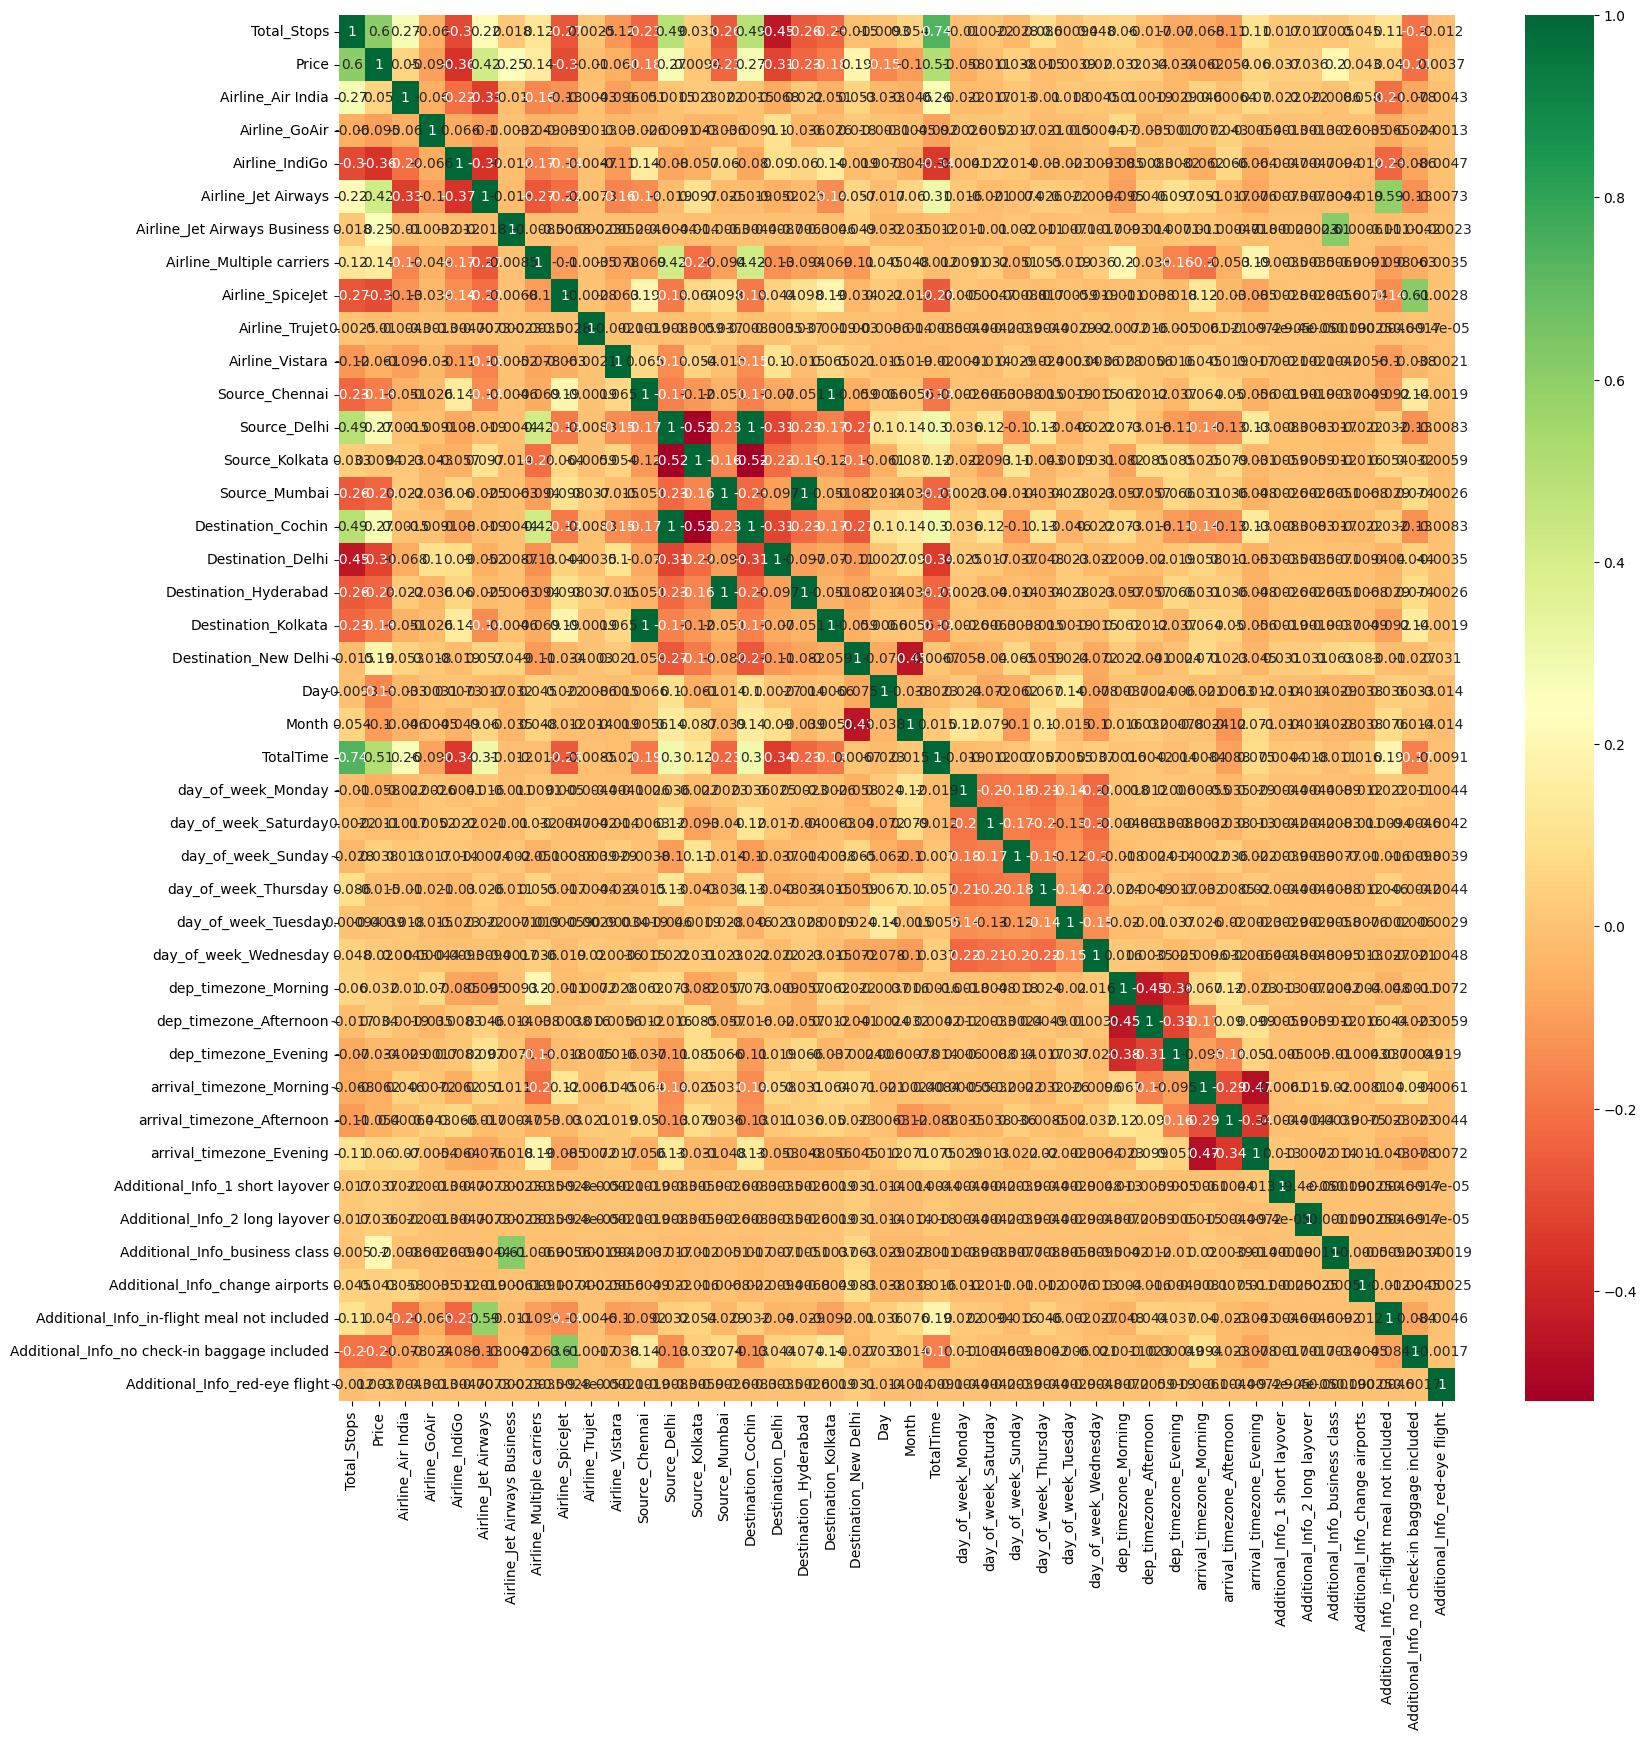

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

plt.show()

Now calculating feature correlation with price and plotting them

<Axes: >

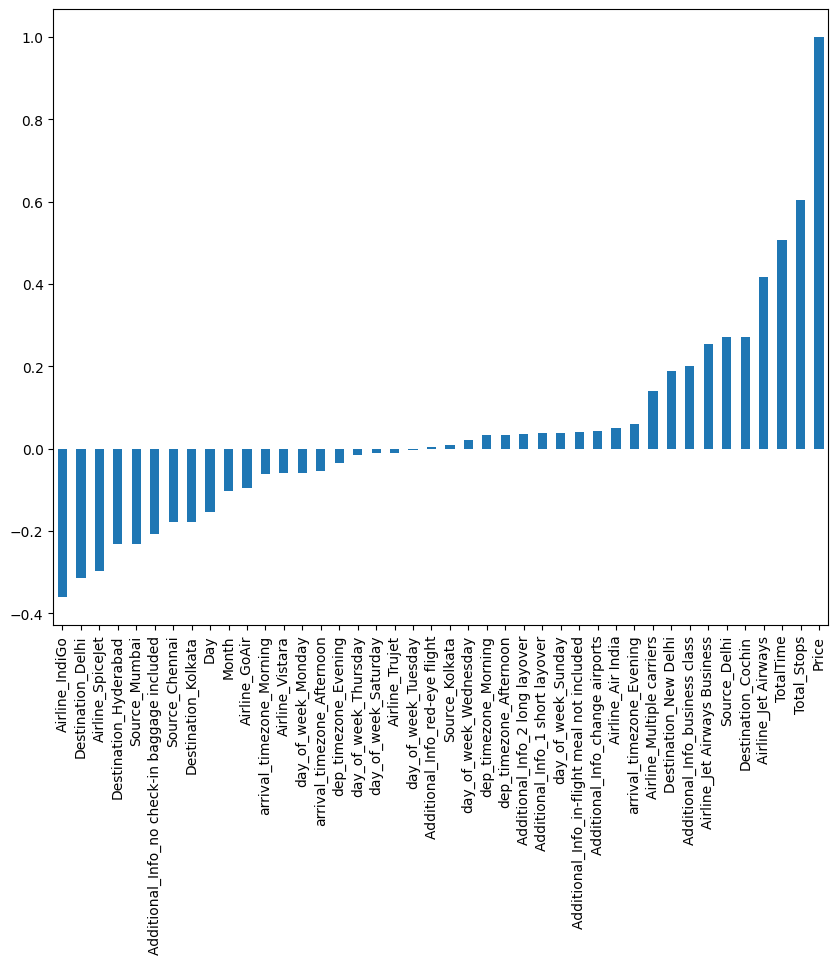

In [ ]:
features = data.corr()['Price'].sort_values()
features.plot(kind='bar',figsize=(10,8))

In [ ]:
data.columns.tolist()

['Total_Stops',
 'Price',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Day',
 'Month',
 'TotalTime',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'dep_timezone_Morning',
 'dep_timezone_Afternoon',
 'dep_timezone_Evening',
 'arrival_timezone_Morning',
 'arrival_timezone_Afternoon',
 'arrival_timezone_Evening',
 'Additional_Info_1 short layover',
 'Additional_Info_2 long layover',
 'Additional_Info_business class',
 'Additional_Info_change airports',
 'Additional_Info_in-flight meal not included',
 'Additional_Info_no check-in baggage in

# Task 2: Implemenation of PCA from Scratch

Transformed Data: [[ 2.1914414 +0.j -0.52796578+0.j -0.01999386+0.j ...  0.15182953+0.j
  -1.21398594+0.j  1.03419822+0.j]
 [ 0.1455568 +0.j -1.33576558+0.j -0.79757176+0.j ...  0.62857691+0.j
  -0.03573313+0.j  0.73939593+0.j]
 [-2.41455385+0.j -0.21337069+0.j -0.42007742+0.j ... -1.36810784+0.j
  -1.28551557+0.j -0.70654118+0.j]
 ...
 [ 1.57370078+0.j -0.07851706+0.j -0.23174988+0.j ...  0.56112922+0.j
  -0.25769232+0.j -1.70911165+0.j]
 [ 2.13633794+0.j -0.27204564+0.j -0.9814402 +0.j ... -1.08452937+0.j
  -0.25549916+0.j  1.55589156+0.j]
 [-2.50423082+0.j  1.2766867 +0.j  0.16301762+0.j ... -0.84813922+0.j
   0.62225893+0.j  0.53103098+0.j]]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


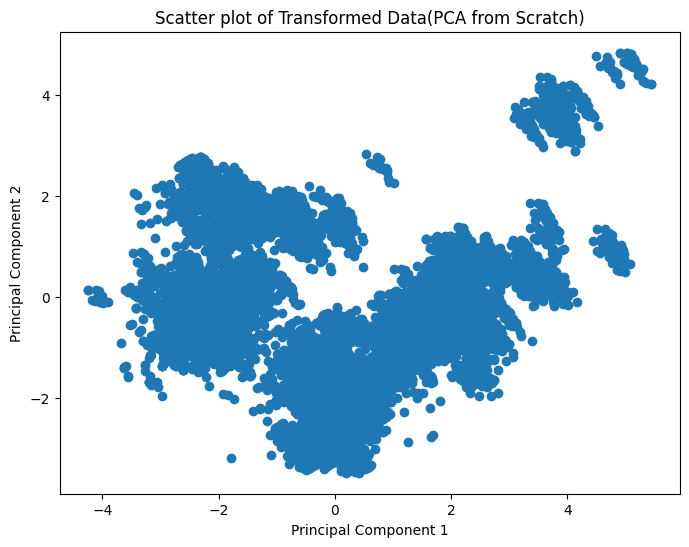

In [ ]:
import numpy as np
from sklearn import preprocessing

# Step 1: Normalize the features (if needed)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data.drop('Price', axis=1))  # Assuming 'Price' is the target column

# Step 2: Compute the covariance matrix
cov_matrix = np.dot(X.T, X) / (len(X) - 1)

# Step 3: Eigen decomposition of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

# Sort eigen values and corresponding eigen vectors in descending order
sorted_indices = np.argsort(eigen_vals)[::-1]
sorted_eigen_vals = eigen_vals[sorted_indices]
sorted_eigen_vecs = eigen_vecs[:, sorted_indices]

# Step 4: Choose number of principal components (e.g., k) based on explained variance ratio
explained_variance_ratio = sorted_eigen_vals / np.sum(sorted_eigen_vals)
cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
k = np.argmax(cum_explained_variance_ratio >= 0.95) + 1  # choose at least 95% explained variance

principal_components = sorted_eigen_vecs[:, :k]

# Step 5: Project the original data onto the principal components subspace
transformed_data = np.dot(X, principal_components)

# transformed_data contains the low-dimensional representations of the original data
print("Transformed Data:", transformed_data)

# Step 6: Visualization (optional)
plt.figure(figsize=(8,6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of Transformed Data(PCA from Scratch)')
plt.show()

[[ 2.19144140e+00 -5.27965779e-01 -1.99938577e-02 ...  2.67682796e-15
  -5.31600214e-15  1.75521812e-15]
 [ 1.45556802e-01 -1.33576558e+00 -7.97571757e-01 ...  2.48468754e-15
  -1.45794876e-14  5.99057380e-15]
 [-2.41455385e+00 -2.13370689e-01 -4.20077418e-01 ...  7.36426696e-16
  -2.09504464e-15  7.93056335e-16]
 ...
 [ 1.57370078e+00 -7.85170639e-02 -2.31749879e-01 ... -6.38095759e-17
   1.22832140e-16 -3.49177178e-17]
 [ 2.13633794e+00 -2.72045636e-01 -9.81440199e-01 ... -4.88357365e-17
   5.16763948e-17  1.70212691e-17]
 [-2.50423082e+00  1.27668670e+00  1.63017624e-01 ... -1.12383473e-16
   3.12345005e-17 -1.07845809e-17]]


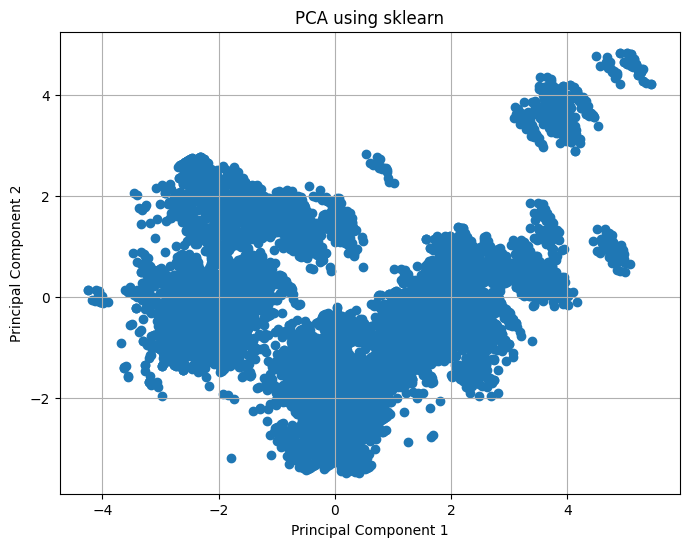

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset into DataFrame df
df = data

# Separate out the features/predictors and the label/target
x = df.loc[:, df.columns!= 'Price']
y = df['Price']

# Scale the features so they have mean = 0 and variance = 1
sc = StandardScaler()
x_std = sc.fit_transform(x)
pca = PCA()
principalComponents = pca.fit_transform(x_std)

print(principalComponents)

# To transform the data into the first two principal components
pc1 = principalComponents[:, 0]
pc2 = principalComponents[:, 1]

# Create a new dataframe containing only the first two principal components
new_df = pd.DataFrame({'PC1': pc1, 'PC2': pc2})

# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(new_df['PC1'], new_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA using sklearn')
plt.grid()
plt.show()

# Plotting the Explained Variances

Explained variance ratio of component 1: 0.098
Explained variance ratio of component 2: 0.063
Explained variance ratio of component 3: 0.052
Explained variance ratio of component 4: 0.046
Explained variance ratio of component 5: 0.044
Explained variance ratio of component 6: 0.041
Explained variance ratio of component 7: 0.039
Explained variance ratio of component 8: 0.039
Explained variance ratio of component 9: 0.036
Explained variance ratio of component 10: 0.034
Explained variance ratio of component 11: 0.032
Explained variance ratio of component 12: 0.031
Explained variance ratio of component 13: 0.030
Explained variance ratio of component 14: 0.030
Explained variance ratio of component 15: 0.029
Explained variance ratio of component 16: 0.027
Explained variance ratio of component 17: 0.027
Explained variance ratio of component 18: 0.025
Explained variance ratio of component 19: 0.025
Explained variance ratio of component 20: 0.024
Explained variance ratio of component 21: 0.024
E

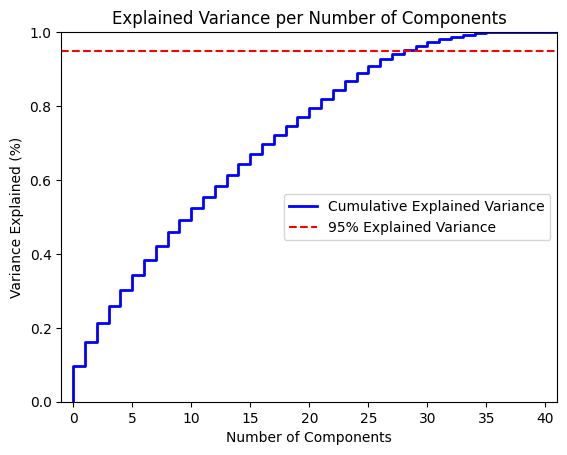

In [ ]:
# Printing the eigenvalues (i.e., explained variances)
explained_variances = pca.explained_variance_ratio_

for i, ev in enumerate(explained_variances):
    print(f'Explained variance ratio of component {i+1}: {ev:.3f}')

# Generate plot showing the cumulated explained variance
cumulative_explained_variance = np.cumsum(explained_variances)

plt.step([i for i in range(len(explained_variances)+1)],
         [0]+list(cumulative_explained_variance),
         color='b', lw=2, label="Cumulative Explained Variance")

plt.axhline(y=0.95, color='r', linestyle='--',
            label="95% Explained Variance")

plt.legend(loc='center right')
plt.ylim([0, 1])
plt.xlim([-1, len(explained_variances)])
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained (%)")
plt.title('Explained Variance per Number of Components')
plt.show();

In [ ]:
reconstructed_features = pca.inverse_transform(principalComponents[:, :41])

reconstruction_error = np.sqrt(np.mean((x_std - reconstructed_features)**2))

reconstruction_error

2.742500885446669e-15

☝️ Practically non-existent error

# Task 7

In [ ]:
# Feature Cols
X = data.iloc[:, :-1].values

# Target
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split

# Splitting data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### PCA w/o Dimensionality Reduction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_full = LogisticRegression()

lr_full.fit(X_train, y_train)

# Predict on train & test datasets
pred_train_lr_full = lr_full.predict(X_train)
pred_test_lr_full = lr_full.predict(X_test)

# Compute training & testing accuracies
acc_train_lr_full = accuracy_score(y_train, pred_train_lr_full)
acc_test_lr_full = accuracy_score(y_test, pred_test_lr_full)

In [ ]:
print(f"PCA w/o Dimensionality Reduction:\nTraining: {acc_train_lr_full} \nTesting:{acc_test_lr_full}")

PCA w/o Dimensionality Reduction:
Training: 0.9998662744049212 
Testing:1.0


### PCA with Dimensionality Reduction


In [ ]:
from sklearn.decomposition import PCA

n_components = X_train.shape[1] // 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

# Predict on train & test datasets
pred_train_lr_pca = lr_pca.predict(X_train_pca)
pred_test_lr_pca = lr_pca.predict(X_test_pca)

# Compute training & testing accuracies
acc_train_lr_pca = accuracy_score(y_train, pred_train_lr_pca)
acc_test_lr_pca = accuracy_score(y_test, pred_test_lr_pca)

print(f"PCA with Dimensionality Reduction:\nTraining: {acc_train_lr_pca} \nTesting:{acc_test_lr_pca}")

PCA with Dimensionality Reduction:
Training: 0.9998662744049212 
Testing:1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
